In [173]:
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv", dtype={
  'Gender':'category',
  'CAEC':'category',
  'CALC':'category',
  'MTRANS':'category',
  'NObeyesdad':'category',
})

df["family_history_with_overweight"] = df["family_history_with_overweight"].apply(lambda v: v == "yes")
df["FAVC"] = df["FAVC"].apply(lambda v: v == "yes")
df["SMOKE"] = df["SMOKE"].apply(lambda v: v == "yes")
df["SCC"] = df["SCC"].apply(lambda v: v == "yes")


df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,True,False,2.0,3.0,Sometimes,False,2.000000,False,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,True,False,3.0,3.0,Sometimes,True,3.000000,True,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,True,False,2.0,3.0,Sometimes,False,2.000000,False,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,False,False,3.0,3.0,Sometimes,False,2.000000,False,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,False,False,2.0,1.0,Sometimes,False,2.000000,False,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,True,True,3.0,3.0,Sometimes,False,1.728139,False,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,True,True,3.0,3.0,Sometimes,False,2.005130,False,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,True,True,3.0,3.0,Sometimes,False,2.054193,False,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,True,True,3.0,3.0,Sometimes,False,2.852339,False,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [174]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Age

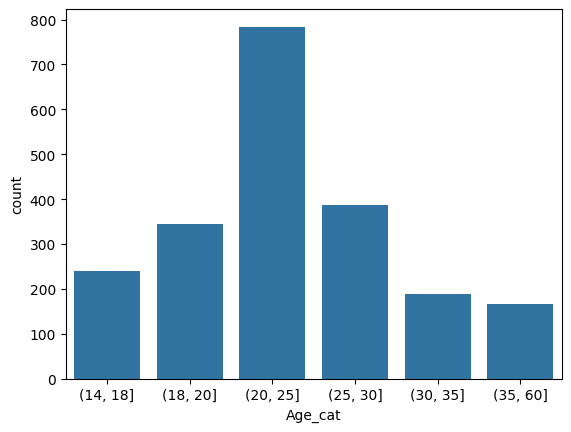

In [175]:
df2 = pd.DataFrame(df)
interval = (14,18, 20, 25, 30, 35, 60)
df2["Age_cat"] = pd.cut(df['Age'], interval)
sns.countplot(data=df2, x='Age_cat')
plt.show()


### Taille

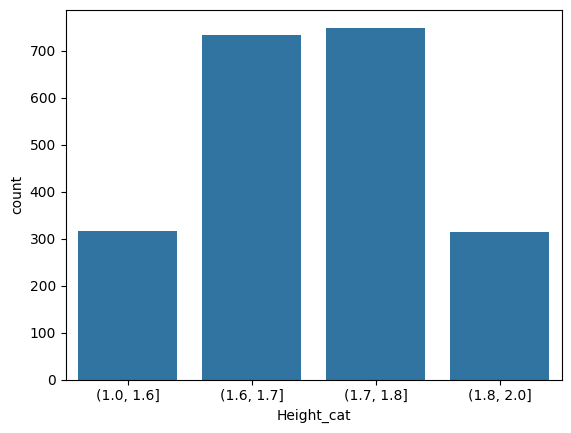

In [176]:
interval = (1,1.6,1.70, 1.80,2)
df2["Height_cat"] = pd.cut(df['Height'], interval)
sns.countplot(data=df2, x='Height_cat')
plt.show()

### Poids

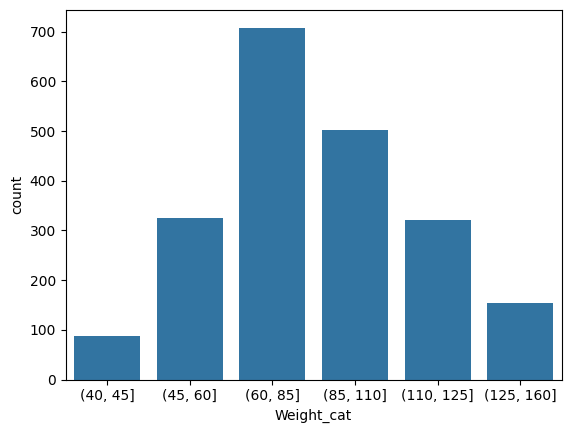

In [177]:
interval = (40,45,60,85,110, 125,160)
df2["Weight_cat"] = pd.cut(df['Weight'], interval)
sns.countplot(data=df2, x='Weight_cat')
plt.show()

Je pense que NCP est inutile car il ya majoritairement qu'une seule valeur.

NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: count, Length: 635, dtype: int64
NCP
Three            1203
Between 1 y 2     199
Name: count, dtype: int64


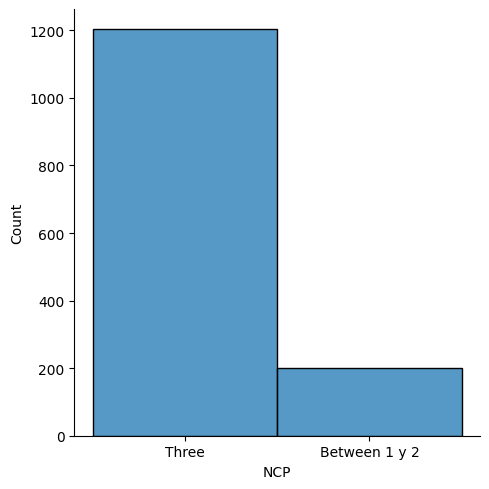

In [178]:
print(df['NCP'].value_counts())
map_dict = {1.0: 'Between 1 y 2', 3.0: 'Three', 4.0: 'More than three'}
df2 = df2[df2['NCP'].isin([1, 3, 4])].replace(map_dict)


print(df2['NCP'].value_counts())
sns.displot(df2['NCP'])
plt.show()

#### FCVC

FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64
FCVC
Sometimes    436
Name: count, dtype: int64


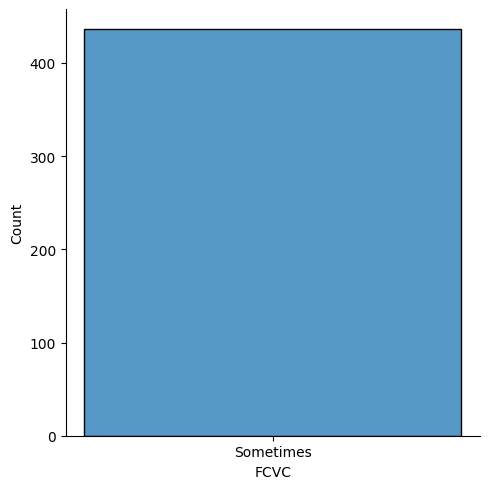

In [179]:
print(df['FCVC'].value_counts())
map_dict = {1.0: 'Never', 2.0: 'Sometimes', 3.0: 'Always'}
df2 = df2[df2['FCVC'].isin([1, 2, 3])].replace(map_dict)


print(df2['FCVC'].value_counts())
sns.displot(df2['FCVC'])
plt.show()


In [180]:
df2.dtypes

Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight        bool
FAVC                                  bool
FCVC                                object
NCP                                 object
CAEC                              category
SMOKE                                 bool
CH2O                                object
SCC                                   bool
FAF                                 object
TUE                                 object
CALC                              category
MTRANS                            category
NObeyesdad                        category
Age_cat                           category
Height_cat                        category
Weight_cat                        category
dtype: object